## Final Project Submission

Please fill out:
* Student name: Matthew Sparr
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Eli 
* Blog post URL:

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import os
import json
from sklearn.metrics import cohen_kappa_score

## Prework

Added 'Group', 'cat_cute', and 'cat_hypo'

## Grab train and test set

In [2]:
train = pd.read_csv('pets_train.csv')
test = pd.read_csv('pets_test.csv')

## Fill missing values

In [3]:
train.isna().sum()

AdoptionSpeed       0
Age                 0
Breed1              0
Breed2              0
Color1              0
Color2              0
Color3              0
Description        12
Dewormed            0
Fee                 0
FurLength           0
Gender              0
Group               0
Health              0
MaturitySize        0
Name             1257
PetID               0
PhotoAmt            0
Quantity            0
RescuerID           0
State               0
Sterilized          0
Type                0
Vaccinated          0
VideoAmt            0
Population          0
UrbanPercent        0
PopDensity          0
cat_Cute            0
cat_Hypo            0
dtype: int64

In [4]:
test.isna().sum()

Age               0
Breed1            0
Breed2            0
Color1            0
Color2            0
Color3            0
Description       2
Dewormed          0
Fee               0
FurLength         0
Gender            0
Group             0
Health            0
MaturitySize      0
Name            303
PetID             0
PhotoAmt          0
Quantity          0
RescuerID         0
State             0
Sterilized        0
Type              0
Vaccinated        0
VideoAmt          0
Population        0
UrbanPercent      0
PopDensity        0
cat_Cute          0
cat_Hypo          0
dtype: int64

In [5]:
train.Name.fillna(' ', inplace=True)
train.Description.fillna(' ', inplace=True)

test.Name.fillna(' ', inplace=True)
test.Description.fillna(' ', inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 30 columns):
AdoptionSpeed    14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
Description      14993 non-null object
Dewormed         14993 non-null int64
Fee              14993 non-null int64
FurLength        14993 non-null int64
Gender           14993 non-null int64
Group            14993 non-null object
Health           14993 non-null int64
MaturitySize     14993 non-null int64
Name             14993 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null int64
Quantity         14993 non-null int64
RescuerID        14993 non-null object
State            14993 non-null int64
Sterilized       14993 non-null int64
Type             14993 non-null int64
Vaccinated  

## Add image metadata

In [7]:
for index, row in train.iterrows():
    file = 'train_metadata/' + row['PetID'] + '-1.json'
    if os.path.exists(file):
        data = json.load(open(file, encoding="utf8"))
        vertex_x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
        vertex_y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']
        bounding_confidence = data['cropHintsAnnotation']['cropHints'][0]['confidence']
        bounding_importance_frac = data['cropHintsAnnotation']['cropHints'][0].get('importanceFraction', -1)
        dominant_blue = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['blue']
        dominant_green = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['green']
        dominant_red = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['red']
        dominant_pixel_frac = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['pixelFraction']
        dominant_score = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['score']
        train.set_value(index, 'vertex_x', vertex_x)
        train.set_value(index, 'vertex_y', vertex_y)
        train.set_value(index, 'bounding_conf', bounding_confidence)                
        train.set_value(index, 'bounding_imp', bounding_importance_frac)                
        train.set_value(index, 'dom_blue', dominant_blue)                
        train.set_value(index, 'dom_green', dominant_green)                
        train.set_value(index, 'dom_red', dominant_red)   
        train.set_value(index, 'pixel_frac', dominant_pixel_frac)                
        train.set_value(index, 'score', dominant_score)
    else:
        train.set_value(index, 'vertex_x', -1)
        train.set_value(index, 'vertex_y', -1)
        train.set_value(index, 'bounding_conf', -1)                
        train.set_value(index, 'bounding_imp', -1)                
        train.set_value(index, 'dom_blue', -1)                
        train.set_value(index, 'dom_green', -1)                
        train.set_value(index, 'dom_red', -1)   
        train.set_value(index, 'pixel_frac', -1)                
        train.set_value(index, 'score', -1)

C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Ple

In [13]:
for index, row in test.iterrows():
    file = 'test_metadata/' + row['PetID'] + '-1.json'
    if os.path.exists(file):
        data = json.load(open(file, encoding="utf8"))
        vertex_x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
        vertex_y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']
        bounding_confidence = data['cropHintsAnnotation']['cropHints'][0]['confidence']
        bounding_importance_frac = data['cropHintsAnnotation']['cropHints'][0].get('importanceFraction', -1)
        dominant_blue = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['blue']
        dominant_green = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['green']
        dominant_red = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['red']
        dominant_pixel_frac = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['pixelFraction']
        dominant_score = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['score']
        test.set_value(index, 'vertex_x', vertex_x)
        test.set_value(index, 'vertex_y', vertex_y)
        test.set_value(index, 'bounding_conf', bounding_confidence)                
        test.set_value(index, 'bounding_imp', bounding_importance_frac)                
        test.set_value(index, 'dom_blue', dominant_blue)                
        test.set_value(index, 'dom_green', dominant_green)                
        test.set_value(index, 'dom_red', dominant_red)   
        test.set_value(index, 'pixel_frac', dominant_pixel_frac)                
        test.set_value(index, 'score', dominant_score)
    else:
        test.set_value(index, 'vertex_x', -1)
        test.set_value(index, 'vertex_y', -1)
        test.set_value(index, 'bounding_conf', -1)                
        test.set_value(index, 'bounding_imp', -1)                
        test.set_value(index, 'dom_blue', -1)                
        test.set_value(index, 'dom_green', -1)                
        test.set_value(index, 'dom_red', -1)   
        test.set_value(index, 'pixel_frac', -1)                
        test.set_value(index, 'score', -1)

C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Ple

## Add name and description length

In [14]:
train['NameLength'] = train['Name'].map(lambda x: 0 if x == 'None' else len(x)).astype('int')
train['DescLength'] = train['Description'].map(lambda x: len(x)).astype('int')
test['NameLength'] = test['Name'].map(lambda x: 0 if x == 'None' else len(x)).astype('int')
test['DescLength'] = test['Description'].map(lambda x: len(x)).astype('int')

## Encode categorical variables

In [15]:
labels = pd.get_dummies(train, columns = ['Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
                                 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
                                 'State', 'Type', 'Group'
                                ])
test_labels = pd.get_dummies(test, columns = ['Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
                                 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
                                 'State', 'Type', 'Group'
                                ])

## Drop irrelevent columns

In [16]:
labels = labels.drop(['Name', 'RescuerID', 'Description', 'PetID', 'AdoptionSpeed'], axis=1)
test_labels = test_labels.drop(['Name', 'RescuerID', 'Description', 'PetID'], axis=1)

## Make sure train and test have same columns

In [23]:
diff_columns = set(labels.columns).difference(set(test_labels.columns))
for i in diff_columns:
    test_labels[i] = test_labels.apply(lambda _: 0, axis=1)
diff_columns2 = set(test_labels.columns).difference(set(labels.columns))
for i in diff_columns2:
    labels[i] = labels.apply(lambda _: 0, axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Set target variable

In [17]:
target = train['AdoptionSpeed']
target = target.astype('int')

## Standardization

In [19]:
X = labels.copy()
y = target.copy()
X_pred = test_labels.copy()

In [20]:
labels = StandardScaler().fit_transform(labels)
test_labels = StandardScaler().fit_transform(test_labels)

C:\Users\sparr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sparr\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sparr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sparr\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Dimensionality reduction

In [46]:
labels.shape[1]

427

In [31]:
pca = PCA(n_components = 0.95).fit(labels)

In [38]:
pca.n_components_

328

## Class imbalance

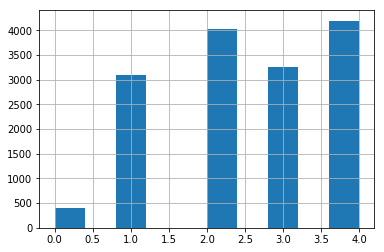

In [49]:
target.hist()

In [50]:
sm = SMOTE(random_state=42)
labels, target = sm.fit_resample(labels, target)

In [58]:
target.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [21]:
clf = xgb.XGBClassifier()
clf.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
clf.predict(X_pred)

ValueError: feature_names mismatch: ['Age', 'Fee', 'PhotoAmt', 'Quantity', 'VideoAmt', 'Population', 'UrbanPercent', 'PopDensity', 'cat_Cute', 'cat_Hypo', 'vertex_x', 'vertex_y', 'bounding_conf', 'bounding_imp', 'dom_blue', 'dom_green', 'dom_red', 'pixel_frac', 'score', 'NameLength', 'DescLength', 'Breed1_0', 'Breed1_1', 'Breed1_3', 'Breed1_5', 'Breed1_7', 'Breed1_10', 'Breed1_11', 'Breed1_15', 'Breed1_16', 'Breed1_17', 'Breed1_18', 'Breed1_19', 'Breed1_20', 'Breed1_21', 'Breed1_23', 'Breed1_24', 'Breed1_25', 'Breed1_26', 'Breed1_31', 'Breed1_32', 'Breed1_39', 'Breed1_42', 'Breed1_44', 'Breed1_49', 'Breed1_50', 'Breed1_56', 'Breed1_58', 'Breed1_60', 'Breed1_61', 'Breed1_64', 'Breed1_65', 'Breed1_69', 'Breed1_70', 'Breed1_71', 'Breed1_72', 'Breed1_75', 'Breed1_76', 'Breed1_78', 'Breed1_81', 'Breed1_82', 'Breed1_83', 'Breed1_85', 'Breed1_88', 'Breed1_93', 'Breed1_97', 'Breed1_98', 'Breed1_99', 'Breed1_100', 'Breed1_102', 'Breed1_103', 'Breed1_105', 'Breed1_108', 'Breed1_109', 'Breed1_111', 'Breed1_114', 'Breed1_117', 'Breed1_119', 'Breed1_122', 'Breed1_123', 'Breed1_125', 'Breed1_128', 'Breed1_129', 'Breed1_130', 'Breed1_132', 'Breed1_139', 'Breed1_141', 'Breed1_143', 'Breed1_145', 'Breed1_146', 'Breed1_147', 'Breed1_148', 'Breed1_150', 'Breed1_152', 'Breed1_154', 'Breed1_155', 'Breed1_165', 'Breed1_167', 'Breed1_169', 'Breed1_173', 'Breed1_176', 'Breed1_178', 'Breed1_179', 'Breed1_182', 'Breed1_185', 'Breed1_187', 'Breed1_188', 'Breed1_189', 'Breed1_190', 'Breed1_192', 'Breed1_195', 'Breed1_197', 'Breed1_199', 'Breed1_200', 'Breed1_201', 'Breed1_202', 'Breed1_203', 'Breed1_204', 'Breed1_205', 'Breed1_206', 'Breed1_207', 'Breed1_212', 'Breed1_213', 'Breed1_214', 'Breed1_215', 'Breed1_217', 'Breed1_218', 'Breed1_224', 'Breed1_227', 'Breed1_228', 'Breed1_231', 'Breed1_232', 'Breed1_233', 'Breed1_234', 'Breed1_237', 'Breed1_239', 'Breed1_240', 'Breed1_241', 'Breed1_242', 'Breed1_243', 'Breed1_244', 'Breed1_245', 'Breed1_246', 'Breed1_247', 'Breed1_248', 'Breed1_249', 'Breed1_250', 'Breed1_251', 'Breed1_252', 'Breed1_253', 'Breed1_254', 'Breed1_256', 'Breed1_257', 'Breed1_260', 'Breed1_262', 'Breed1_263', 'Breed1_264', 'Breed1_265', 'Breed1_266', 'Breed1_267', 'Breed1_268', 'Breed1_269', 'Breed1_270', 'Breed1_271', 'Breed1_272', 'Breed1_273', 'Breed1_274', 'Breed1_276', 'Breed1_277', 'Breed1_279', 'Breed1_280', 'Breed1_281', 'Breed1_282', 'Breed1_283', 'Breed1_284', 'Breed1_285', 'Breed1_286', 'Breed1_287', 'Breed1_288', 'Breed1_289', 'Breed1_290', 'Breed1_292', 'Breed1_293', 'Breed1_294', 'Breed1_295', 'Breed1_296', 'Breed1_297', 'Breed1_298', 'Breed1_299', 'Breed1_300', 'Breed1_301', 'Breed1_302', 'Breed1_303', 'Breed1_304', 'Breed1_305', 'Breed1_306', 'Breed1_307', 'Breed2_0', 'Breed2_1', 'Breed2_2', 'Breed2_4', 'Breed2_5', 'Breed2_10', 'Breed2_14', 'Breed2_16', 'Breed2_17', 'Breed2_18', 'Breed2_19', 'Breed2_20', 'Breed2_21', 'Breed2_24', 'Breed2_25', 'Breed2_26', 'Breed2_36', 'Breed2_39', 'Breed2_40', 'Breed2_44', 'Breed2_49', 'Breed2_50', 'Breed2_58', 'Breed2_60', 'Breed2_65', 'Breed2_69', 'Breed2_70', 'Breed2_72', 'Breed2_75', 'Breed2_76', 'Breed2_78', 'Breed2_83', 'Breed2_96', 'Breed2_98', 'Breed2_102', 'Breed2_103', 'Breed2_104', 'Breed2_109', 'Breed2_111', 'Breed2_115', 'Breed2_117', 'Breed2_119', 'Breed2_122', 'Breed2_128', 'Breed2_129', 'Breed2_130', 'Breed2_141', 'Breed2_146', 'Breed2_147', 'Breed2_150', 'Breed2_152', 'Breed2_155', 'Breed2_159', 'Breed2_167', 'Breed2_169', 'Breed2_173', 'Breed2_176', 'Breed2_178', 'Breed2_179', 'Breed2_182', 'Breed2_187', 'Breed2_188', 'Breed2_189', 'Breed2_190', 'Breed2_192', 'Breed2_195', 'Breed2_200', 'Breed2_201', 'Breed2_202', 'Breed2_203', 'Breed2_204', 'Breed2_205', 'Breed2_206', 'Breed2_207', 'Breed2_210', 'Breed2_212', 'Breed2_213', 'Breed2_218', 'Breed2_227', 'Breed2_228', 'Breed2_237', 'Breed2_239', 'Breed2_240', 'Breed2_241', 'Breed2_242', 'Breed2_243', 'Breed2_245', 'Breed2_246', 'Breed2_247', 'Breed2_248', 'Breed2_249', 'Breed2_250', 'Breed2_251', 'Breed2_252', 'Breed2_254', 'Breed2_256', 'Breed2_257', 'Breed2_260', 'Breed2_262', 'Breed2_263', 'Breed2_264', 'Breed2_265', 'Breed2_266', 'Breed2_267', 'Breed2_268', 'Breed2_270', 'Breed2_271', 'Breed2_272', 'Breed2_274', 'Breed2_276', 'Breed2_277', 'Breed2_278', 'Breed2_279', 'Breed2_282', 'Breed2_283', 'Breed2_284', 'Breed2_285', 'Breed2_288', 'Breed2_289', 'Breed2_290', 'Breed2_291', 'Breed2_292', 'Breed2_293', 'Breed2_294', 'Breed2_295', 'Breed2_296', 'Breed2_299', 'Breed2_300', 'Breed2_301', 'Breed2_302', 'Breed2_303', 'Breed2_304', 'Breed2_305', 'Breed2_306', 'Breed2_307', 'Gender_1', 'Gender_2', 'Gender_3', 'Color1_1', 'Color1_2', 'Color1_3', 'Color1_4', 'Color1_5', 'Color1_6', 'Color1_7', 'Color2_0', 'Color2_2', 'Color2_3', 'Color2_4', 'Color2_5', 'Color2_6', 'Color2_7', 'Color3_0', 'Color3_3', 'Color3_4', 'Color3_5', 'Color3_6', 'Color3_7', 'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_1', 'FurLength_2', 'FurLength_3', 'Vaccinated_1', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_1', 'Dewormed_2', 'Dewormed_3', 'Sterilized_1', 'Sterilized_2', 'Sterilized_3', 'Health_1', 'Health_2', 'Health_3', 'State_41324', 'State_41325', 'State_41326', 'State_41327', 'State_41330', 'State_41332', 'State_41335', 'State_41336', 'State_41342', 'State_41345', 'State_41361', 'State_41367', 'State_41401', 'State_41415', 'Type_1', 'Type_2', 'Group_Cat', 'Group_FSS', 'Group_Herding', 'Group_Hound', 'Group_Hunting', 'Group_Misc', 'Group_Non-Sporting', 'Group_Sporting', 'Group_Terrier', 'Group_Toy', 'Group_Working'] ['Age', 'Fee', 'PhotoAmt', 'Quantity', 'VideoAmt', 'Population', 'UrbanPercent', 'PopDensity', 'cat_Cute', 'cat_Hypo', 'vertex_x', 'vertex_y', 'bounding_conf', 'bounding_imp', 'dom_blue', 'dom_green', 'dom_red', 'pixel_frac', 'score', 'NameLength', 'DescLength', 'Breed1_2', 'Breed1_5', 'Breed1_6', 'Breed1_7', 'Breed1_10', 'Breed1_14', 'Breed1_17', 'Breed1_18', 'Breed1_19', 'Breed1_20', 'Breed1_24', 'Breed1_25', 'Breed1_26', 'Breed1_31', 'Breed1_39', 'Breed1_44', 'Breed1_49', 'Breed1_50', 'Breed1_51', 'Breed1_56', 'Breed1_58', 'Breed1_60', 'Breed1_65', 'Breed1_69', 'Breed1_70', 'Breed1_72', 'Breed1_75', 'Breed1_76', 'Breed1_78', 'Breed1_82', 'Breed1_83', 'Breed1_94', 'Breed1_102', 'Breed1_103', 'Breed1_104', 'Breed1_105', 'Breed1_109', 'Breed1_112', 'Breed1_116', 'Breed1_117', 'Breed1_119', 'Breed1_122', 'Breed1_126', 'Breed1_128', 'Breed1_141', 'Breed1_142', 'Breed1_147', 'Breed1_152', 'Breed1_154', 'Breed1_169', 'Breed1_173', 'Breed1_176', 'Breed1_178', 'Breed1_179', 'Breed1_182', 'Breed1_187', 'Breed1_188', 'Breed1_189', 'Breed1_190', 'Breed1_195', 'Breed1_200', 'Breed1_201', 'Breed1_203', 'Breed1_204', 'Breed1_205', 'Breed1_206', 'Breed1_207', 'Breed1_213', 'Breed1_214', 'Breed1_215', 'Breed1_218', 'Breed1_222', 'Breed1_231', 'Breed1_233', 'Breed1_241', 'Breed1_242', 'Breed1_243', 'Breed1_245', 'Breed1_246', 'Breed1_247', 'Breed1_248', 'Breed1_249', 'Breed1_250', 'Breed1_251', 'Breed1_252', 'Breed1_253', 'Breed1_254', 'Breed1_258', 'Breed1_260', 'Breed1_262', 'Breed1_263', 'Breed1_264', 'Breed1_265', 'Breed1_266', 'Breed1_267', 'Breed1_268', 'Breed1_271', 'Breed1_272', 'Breed1_276', 'Breed1_278', 'Breed1_280', 'Breed1_281', 'Breed1_282', 'Breed1_283', 'Breed1_284', 'Breed1_285', 'Breed1_286', 'Breed1_287', 'Breed1_288', 'Breed1_289', 'Breed1_292', 'Breed1_293', 'Breed1_295', 'Breed1_296', 'Breed1_297', 'Breed1_299', 'Breed1_300', 'Breed1_301', 'Breed1_303', 'Breed1_304', 'Breed1_306', 'Breed1_307', 'Breed2_0', 'Breed2_14', 'Breed2_17', 'Breed2_18', 'Breed2_20', 'Breed2_26', 'Breed2_39', 'Breed2_44', 'Breed2_49', 'Breed2_50', 'Breed2_51', 'Breed2_58', 'Breed2_62', 'Breed2_65', 'Breed2_69', 'Breed2_70', 'Breed2_75', 'Breed2_76', 'Breed2_78', 'Breed2_91', 'Breed2_100', 'Breed2_102', 'Breed2_103', 'Breed2_109', 'Breed2_111', 'Breed2_119', 'Breed2_128', 'Breed2_129', 'Breed2_141', 'Breed2_147', 'Breed2_152', 'Breed2_165', 'Breed2_168', 'Breed2_173', 'Breed2_178', 'Breed2_179', 'Breed2_182', 'Breed2_187', 'Breed2_189', 'Breed2_195', 'Breed2_200', 'Breed2_202', 'Breed2_205', 'Breed2_207', 'Breed2_212', 'Breed2_213', 'Breed2_218', 'Breed2_233', 'Breed2_241', 'Breed2_242', 'Breed2_243', 'Breed2_246', 'Breed2_247', 'Breed2_250', 'Breed2_251', 'Breed2_252', 'Breed2_253', 'Breed2_254', 'Breed2_257', 'Breed2_258', 'Breed2_261', 'Breed2_263', 'Breed2_264', 'Breed2_265', 'Breed2_266', 'Breed2_271', 'Breed2_276', 'Breed2_278', 'Breed2_280', 'Breed2_281', 'Breed2_283', 'Breed2_284', 'Breed2_285', 'Breed2_288', 'Breed2_292', 'Breed2_294', 'Breed2_295', 'Breed2_296', 'Breed2_297', 'Breed2_299', 'Breed2_300', 'Breed2_303', 'Breed2_304', 'Breed2_305', 'Breed2_306', 'Breed2_307', 'Gender_1', 'Gender_2', 'Gender_3', 'Color1_1', 'Color1_2', 'Color1_3', 'Color1_4', 'Color1_5', 'Color1_6', 'Color1_7', 'Color2_0', 'Color2_2', 'Color2_3', 'Color2_4', 'Color2_5', 'Color2_6', 'Color2_7', 'Color3_0', 'Color3_3', 'Color3_4', 'Color3_5', 'Color3_6', 'Color3_7', 'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_1', 'FurLength_2', 'FurLength_3', 'Vaccinated_1', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_1', 'Dewormed_2', 'Dewormed_3', 'Sterilized_1', 'Sterilized_2', 'Sterilized_3', 'Health_1', 'Health_2', 'Health_3', 'State_41324', 'State_41325', 'State_41326', 'State_41327', 'State_41330', 'State_41332', 'State_41335', 'State_41336', 'State_41342', 'State_41345', 'State_41361', 'State_41367', 'State_41401', 'Type_1', 'Type_2', 'Group_Cat', 'Group_FSS', 'Group_Herding', 'Group_Hound', 'Group_Misc', 'Group_Non-Sporting', 'Group_Sporting', 'Group_Terrier', 'Group_Toy', 'Group_Working']
expected Breed1_88, Breed1_224, Breed2_146, Breed1_16, Breed2_237, Breed2_1, Breed1_108, Breed1_98, Breed1_256, Breed1_228, Breed1_100, Breed2_245, Breed2_60, Breed2_72, Breed1_11, Breed2_279, Breed1_232, Breed1_197, Breed1_21, Breed2_248, Breed2_240, Breed2_19, Breed2_272, Breed1_97, Breed2_40, State_41415, Breed1_273, Breed1_139, Breed1_237, Breed2_268, Breed2_122, Breed2_150, Breed2_16, Breed1_302, Breed1_150, Breed1_270, Breed1_199, Breed2_130, Breed2_239, Breed2_190, Breed2_256, Breed1_0, Breed1_212, Breed2_228, Breed1_3, Breed2_227, Breed1_114, Breed1_240, Breed2_282, Breed1_269, Breed2_249, Breed1_146, Breed2_4, Breed2_2, Breed2_290, Breed2_274, Breed2_5, Breed1_234, Breed2_169, Breed1_93, Breed1_125, Breed1_85, Breed2_270, Breed2_293, Breed2_104, Breed2_10, Breed2_98, Breed1_279, Breed1_64, Breed1_165, Breed2_262, Breed2_206, Breed1_148, Breed1_61, Breed1_1, Breed1_185, Breed1_132, Breed2_201, Breed2_302, Breed1_298, Breed1_257, Breed1_129, Breed1_239, Breed1_23, Breed1_167, Breed2_117, Breed1_71, Breed1_274, Breed1_290, Breed1_277, Breed2_188, Breed2_36, Breed2_260, Breed1_99, Breed2_115, Breed1_111, Breed1_42, Breed2_176, Breed2_301, Breed2_155, Breed2_204, Breed2_159, Breed1_15, Breed1_305, Breed1_145, Breed2_289, Breed2_291, Breed2_277, Breed1_81, Breed2_210, Breed1_32, Breed2_83, Breed2_167, Breed2_24, Group_Hunting, Breed2_203, Breed2_267, Breed1_143, Breed1_202, Breed2_25, Breed1_217, Breed1_192, Breed2_192, Breed1_244, Breed1_123, Breed1_155, Breed1_130, Breed1_227, Breed1_294, Breed2_21, Breed2_96 in input data
training data did not have the following fields: Breed2_297, Breed1_14, Breed1_2, Breed1_51, Breed2_51, Breed1_222, Breed1_104, Breed2_91, Breed2_100, Breed2_280, Breed1_112, Breed2_261, Breed1_116, Breed1_258, Breed2_165, Breed1_142, Breed2_233, Breed2_253, Breed1_6, Breed2_258, Breed1_278, Breed2_62, Breed1_94, Breed2_168, Breed1_126, Breed2_281

In [53]:
#test_labels = test_labels[labels.columns]
pred = pd.DataFrame()
pred['PetID'] = test['PetID']
pred['AdoptionSpeed'] = clf.predict(test_labels)
pred.set_index('PetID').to_csv("submission.csv", index=True)
print('DONE')

DONE


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002834C4F29B0>]],
      dtype=object)

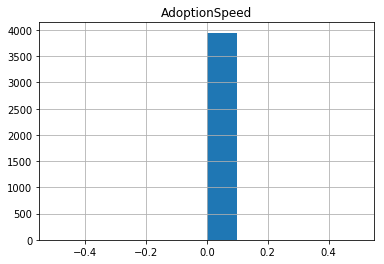

In [54]:
pred.hist()

In [48]:
from imblearn.pipeline import make_pipeline, Pipeline

smote_enn = SMOTEENN(smote = sm)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=1)

pipeline = Pipeline([('smote_enn', smote_enn),
                     ('clf_rf', clf_rf)])

NameError: name 'SMOTEENN' is not defined

In [ ]:
print(labels.shape)
print(test_labels.shape)

In [51]:
clf = xgb.XGBClassifier()
clf.fit(labels, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
pred = clf.predict(labels)

In [54]:
cohen_kappa_score(pred, target)

0.26491534487147095

In [55]:
clf = RandomForestClassifier()
clf.fit(labels, target)

C:\Users\sparr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
pred = clf.predict(labels)

In [57]:
cohen_kappa_score(pred, target)

0.9865461251315598

In [67]:
X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=.5)

In [68]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\sparr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
y_pred = clf.predict(X_test)

In [70]:
cohen_kappa_score(y_pred, y_test)

0.14861577787722746

In [10]:
#train.to_csv('pets_train.csv')
#test.to_csv('pets_test.csv')